# 머신 러닝 교과서 - 파이토치편

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/ml-with-pytorch/blob/main/ch12/ch12_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

## 패키지 버전 체크

check_packages.py 스크립트에서 로드하기 위해 폴더를 추가합니다:

In [1]:
import sys

# 코랩의 경우 깃허브 저장소로부터 python_environment_check.py를 다운로드 합니다.
if 'google.colab' in sys.modules:
    !wget https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/python_environment_check.py
else:
    sys.path.insert(0, '..')

권장 패키지 버전을 확인하세요:

In [2]:
import sys
sys.path.append('..')  # 상위 디렉토리 추가

from python_environment_check import check_packages

[OK] Your Python version is 3.11.12 (main, Apr  9 2025, 04:03:34) [MSC v.1943 64 bit (AMD64)]


In [3]:
from python_environment_check import check_packages

d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'torch': '1.9.0',
}
check_packages(d)

[OK] numpy 2.1.2
[OK] matplotlib 3.10.3
[OK] torch 2.7.0+cu118


# 12장 - 파이토치를 사용한 신경망 훈련 (파트 1/2)


- 파이토치와 훈련 성능
  - 성능 문제
  - 파이토치란?
  - 파이토치 학습 방법
- 파이토치 처음 시작하기
  - 파이토치 설치
  - 파이토치에서 텐서 만들기
  - 텐서의 데이터 타입과 크기 조작
  - 텐서에 수학 연산 적용
  - `chunk()`, `stack()`, `cat()` 함수
- 파이토치 입력 파이프라인 구축
  - 텐서에서 파이토치 `DataLoader` 만들기
  - 두 개의 텐서를 하나의 데이터셋으로 연결
  - 셔플, 배치, 반복
  - 로컬 디스크에 있는 파일에서 데이터셋 만들기
  - `torchvision.datasets` 라이브러리에서 데이터셋 로드

In [4]:
from IPython.display import Image as IPythonImage
%matplotlib inline

## 파이토치와 훈련 성능

### 성능 문제

In [5]:
IPythonImage(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/figures/12_01.png', width=500)

### 파이토치란?

In [6]:
IPythonImage(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/figures/12_02.png', width=500)

### 파이토치 학습 방법

## 파이토치 처음 시작하기

### 파이토치 설치

In [7]:
#! pip install torch

In [8]:
import torch
import numpy as np

print('파이토치 버전:', torch.__version__)

np.set_printoptions(precision=3)

파이토치 버전: 2.7.0+cu118


In [9]:
# !python -c 'import torch; print(torch.__version__)'

### 파이토치에서 텐서 만들기

In [10]:
a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


In [11]:
torch.is_tensor(a), torch.is_tensor(t_a)

(False, True)

In [12]:
t_ones = torch.ones(2, 3)

t_ones.shape

torch.Size([2, 3])

In [13]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [14]:
rand_tensor = torch.rand(2,3)

print(rand_tensor)

tensor([[0.9848, 0.2963, 0.7090],
        [0.1342, 0.5131, 0.6937]])


### 텐서의 데이터 타입과 크기 조작

In [15]:
t_a_new = t_a.to(torch.int64)

print(t_a_new.dtype)

torch.int64


In [16]:
t = torch.rand(3, 5)

t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


In [17]:
t = torch.zeros(30)

t_reshape = t.reshape(5, 6)

print(t_reshape.shape)

torch.Size([5, 6])


In [18]:
t = torch.zeros(1, 2, 1, 4, 1)

t_sqz = torch.squeeze(t, 2)

print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


### 텐서에 수학 연산 적용

In [19]:
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

In [20]:
t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [21]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


In [22]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))

print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [23]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)

print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [24]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)

print(norm_t1)

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])


In [25]:
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

array([0.678, 0.508, 1.116, 0.549, 0.185], dtype=float32)

### `chunk()`, `stack()`, `cat()` 함수

In [26]:
torch.manual_seed(1)

t = torch.rand(6)

print(t)

t_splits = torch.chunk(t, 3)

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


[array([0.758, 0.279], dtype=float32),
 array([0.403, 0.735], dtype=float32),
 array([0.029, 0.8  ], dtype=float32)]

In [27]:
torch.manual_seed(1)
t = torch.rand(5)

print(t)

t_splits = torch.split(t, split_size_or_sections=[3, 2])

[item.numpy() for item in t_splits]

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


[array([0.758, 0.279, 0.403], dtype=float32),
 array([0.735, 0.029], dtype=float32)]

In [28]:
A = torch.ones(3)
B = torch.zeros(2)

C = torch.cat([A, B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


In [29]:
A = torch.ones(3)
B = torch.zeros(3)

S = torch.stack([A, B], axis=1)
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


## 파이토치 입력 파이프라인 구축

### 텐서에서 파이토치 `DataLoader` 만들기

In [30]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

In [31]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


In [32]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'배치 {i}:', batch)

배치 1: tensor([0., 1., 2.])
배치 2: tensor([3., 4., 5.])


### 두 개의 텐서를 하나의 데이터셋으로 연결

In [33]:
from torch.utils.data import Dataset

class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

In [34]:
import torch
torch.manual_seed(1)

t_x = torch.rand([4, 3], dtype=torch.float32)
t_y = torch.arange(4)
joint_dataset = JointDataset(t_x, t_y)

# 또는 TensorDataset을 사용합니다.
from torch.utils.data import TensorDataset
joint_dataset = TensorDataset(t_x, t_y)

for example in joint_dataset:
    print('  x: ', example[0],
          '  y: ', example[1])

  x:  tensor([0.7576, 0.2793, 0.4031])   y:  tensor(0)
  x:  tensor([0.7347, 0.0293, 0.7999])   y:  tensor(1)
  x:  tensor([0.3971, 0.7544, 0.5695])   y:  tensor(2)
  x:  tensor([0.4388, 0.6387, 0.5247])   y:  tensor(3)


### 셔플, 배치, 반복

In [35]:
from torch.utils.data import DataLoader

torch.manual_seed(1)
data_loader = DataLoader(dataset=joint_dataset, batch_size=2, shuffle=True)

for i, batch in enumerate(data_loader, 1):
        print(f'배치 {i}:', 'x:', batch[0],
              '\n       y:', batch[1])

for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i, batch in enumerate(data_loader, 1):
        print(f'배치 {i}:', 'x:', batch[0],
              '\n       y:', batch[1])

배치 1: x: tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
       y: tensor([2, 0])
배치 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
       y: tensor([1, 3])
epoch 1
배치 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
       y: tensor([0, 2])
배치 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
       y: tensor([1, 3])
epoch 2
배치 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
       y: tensor([3, 2])
배치 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
       y: tensor([0, 1])


### 로컬 디스크에 있는 파일에서 데이터셋 만들기

In [36]:
# 코랩의 경우 깃허브에서 cat_dog_images를 다운받아 압축을 풉니다.
if 'google.colab' in sys.modules:
    !wget https://github.com/rickiepark/ml-with-pytorch/raw/main/ch12/cat_dog_images.tar.gz
    !tar -xvzf cat_dog_images.tar.gz

In [37]:
import urllib.request
import tarfile

# 1. 파일 다운로드
url = "https://github.com/rickiepark/ml-with-pytorch/raw/main/ch12/cat_dog_images.tar.gz"
filename = "cat_dog_images.tar.gz"
urllib.request.urlretrieve(url, filename)

# 2. 압축 해제
with tarfile.open(filename, "r:gz") as tar:
    tar.extractall()

In [38]:
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
print(file_list)

['cat_dog_images\\cat-01.jpg', 'cat_dog_images\\cat-02.jpg', 'cat_dog_images\\cat-03.jpg', 'cat_dog_images\\dog-01.jpg', 'cat_dog_images\\dog-02.jpg', 'cat_dog_images\\dog-03.jpg']


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


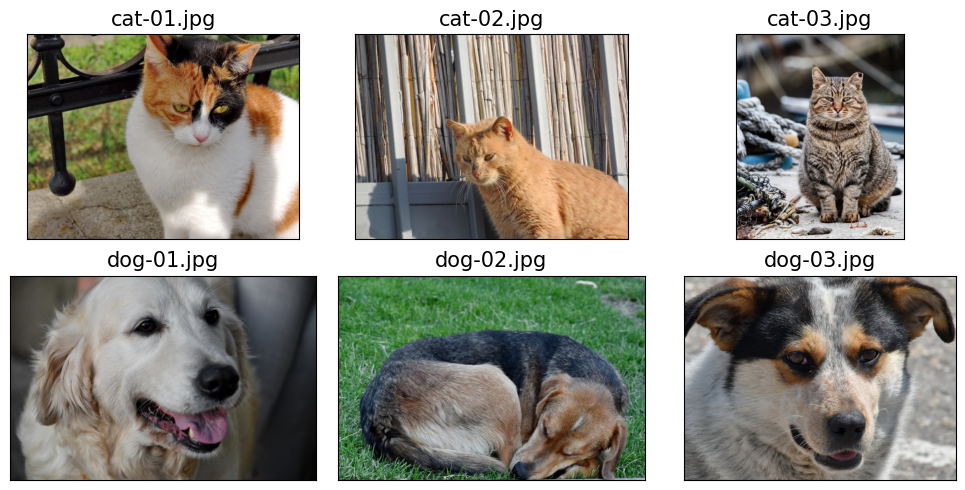

In [39]:
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape: ', np.array(img).shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

#plt.savefig('figures/12_03.pdf')
plt.tight_layout()
plt.show()

In [40]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [41]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels

    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label

    def __len__(self):
        return len(self.labels)

image_dataset = ImageDataset(file_list, labels)
for file, label in image_dataset:
    print(file, label)

cat_dog_images\cat-01.jpg 0
cat_dog_images\cat-02.jpg 0
cat_dog_images\cat-03.jpg 0
cat_dog_images\dog-01.jpg 1
cat_dog_images\dog-02.jpg 1
cat_dog_images\dog-03.jpg 1


In [42]:
import torchvision.transforms as transforms

class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label
    def __len__(self):
        return len(self.labels)

img_height, img_width = 80, 120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width), antialias=True),
])

image_dataset = ImageDataset(file_list, labels, transform)

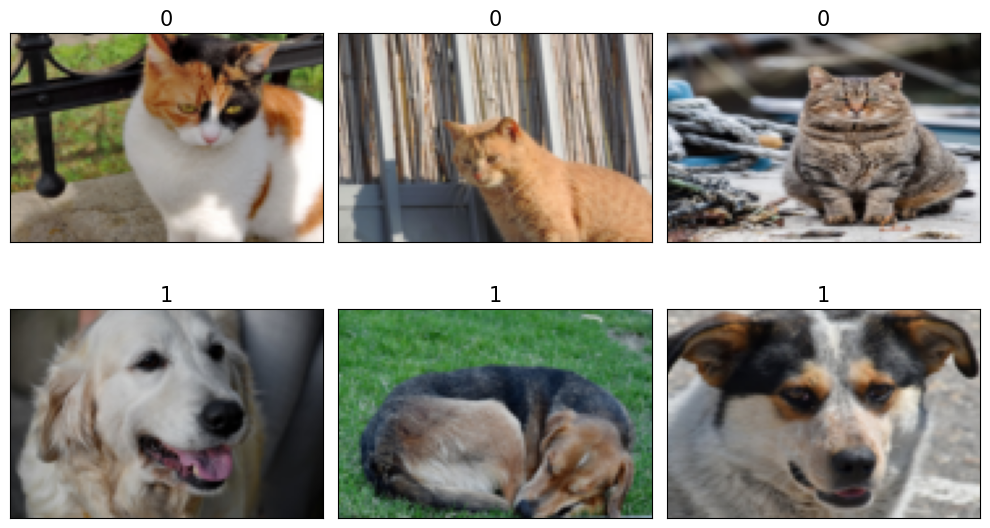

In [43]:
fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(image_dataset):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    # 부동소숫점 오차 때문에 픽셀값이 0~1 사이가 아니라는 맷플롯립의 경고를 제거하기 위해
    # 255를 곱한다음 uint8로 캐스팅합니다.
    ax.imshow((example[0].numpy().transpose((1, 2, 0))*255).astype(np.uint8))
    ax.set_title(f'{example[1]}', size=15)

plt.tight_layout()
# plt.savefig('figures/12_04.pdf')
plt.show()

### `torchvision.datasets` 라이브러리에서 데이터셋 로드

In [44]:
# ! pip install torchvision

In [45]:
import torchvision

**Fetching CelebA dataset**

---

1. 이미지 파일을 수동으로 다운로드하기

    - 아래 코드에서 데이터를 다운로드할 때 `BadZipfile` 오류가 발생하면 `download=False`로 설정하고 http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html 에서 `img_align_celeba.zip` 파일을 수동으로 다운로드하세요. 구글 드라이브 폴더에서 아래와 같이 `Img` 폴더 아래에서 찾을 수 있습니다:

In [46]:
IPythonImage(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/figures/gdrive-download-location-1.png', width=500)

- 다음 링크를 사용해도 됩니다: https://drive.google.com/file/d/0B7EVK8r0v71pZjFTYXZWM3FlRnM/view?usp=sharing&resourcekey=0-dYn9z10tMJOBAkviAcfdyQ
- 다운로드 후 이 파일을 `./celeba` 하위 폴더에 넣고 압축을 풀어주세요.

2. 다음으로 어노테이션 파일을 다운로드하여 동일한 `./celeba` 하위 폴더에 넣어야 합니다. 주석 파일은 `Anno`에서 찾을 수 있습니다:

In [47]:
IPythonImage(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/figures/gdrive-download-location-2.png', width=300)

- 개별 파일의 링크는 다음과 같습니다:
  - [identity_CelebA.txt](https://drive.google.com/file/d/1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS/view?usp=sharing)
  - [list_attr_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pblRyaVFSWGxPY0U/view?usp=sharing&resourcekey=0-YW2qIuRcWHy_1C2VaRGL3Q)
  - [list_bbox_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pbThiMVRxWXZ4dU0/view?usp=sharing&resourcekey=0-z-17UMo1wt4moRL2lu9D8A)
  - [list_landmarks_align_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pd0FJY3Blby1HUTQ/view?usp=sharing&resourcekey=0-aFtzLN5nfdhHXpAsgYA8_g)
  - [list_landmarks_celeba.txt](https://drive.google.com/file/d/0B7EVK8r0v71pTzJIdlJWdHczRlU/view?usp=sharing&resourcekey=0-49BtYuqFDomi-1v0vNVwrQ)

In [48]:
IPythonImage(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/figures/gdrive-download-location-3.png', width=300)

3. 마지막으로 `list_eval_partition.txt` 파일을 다운로드하여 `./celeba` 아래로 옮깁니다:

- [list_eval_partition.txt](https://drive.google.com/file/d/0B7EVK8r0v71pY0NSMzRuSXJEVkk/view?usp=sharing&resourcekey=0-i4TGCi_51OtQ5K9FSp4EDg)

위의 1~3단계를 완료한 후 `./celeba` 하위 폴더에 다음 파일이 있고 파일이 비어 있지 않은지(즉, 아래와 파일 크기가 비슷한지) 확인하세요:

In [49]:
IPythonImage(url='https://raw.githubusercontent.com/rickiepark/ml-with-pytorch/main/ch12/figures/celeba-files.png', width=400)

---

In [50]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [51]:
image_path = './'
celeba_dataset = torchvision.datasets.CelebA(image_path, split='train', target_type='attr', download=True)

assert isinstance(celeba_dataset, torch.utils.data.Dataset)

In [52]:
example = next(iter(celeba_dataset))
print(example)

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=178x218 at 0x22DF4A4FFD0>, tensor([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1]))


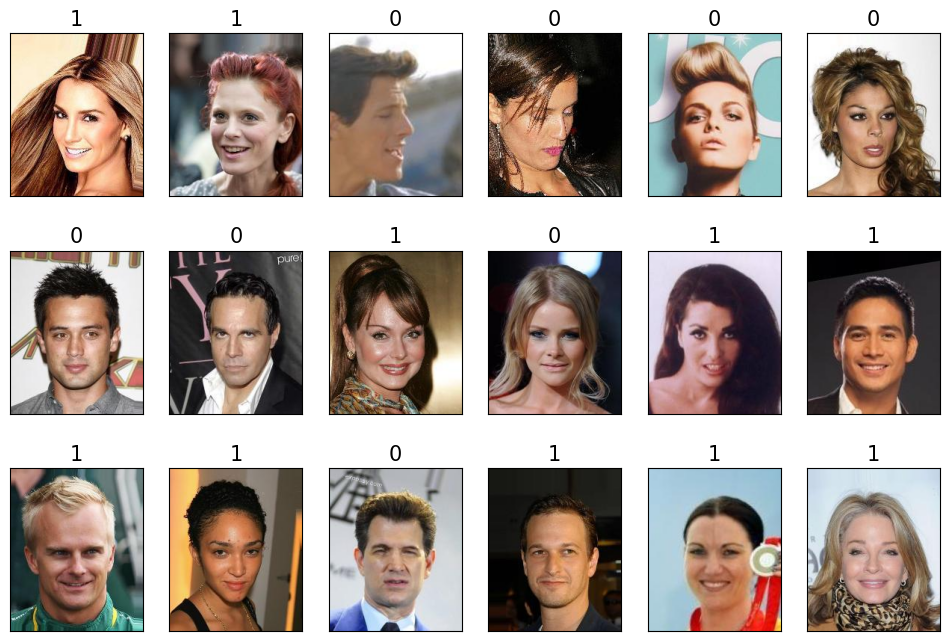

In [53]:
from itertools import islice
fig = plt.figure(figsize=(12, 8))
for i, (image, attributes) in islice(enumerate(celeba_dataset), 18):
    ax = fig.add_subplot(3, 6, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image)
    ax.set_title(f'{attributes[31]}', size=15)

#plt.savefig('figures/12_05.pdf')
plt.show()

(<PIL.Image.Image image mode=L size=28x28 at 0x22DF4FF0650>, 5)


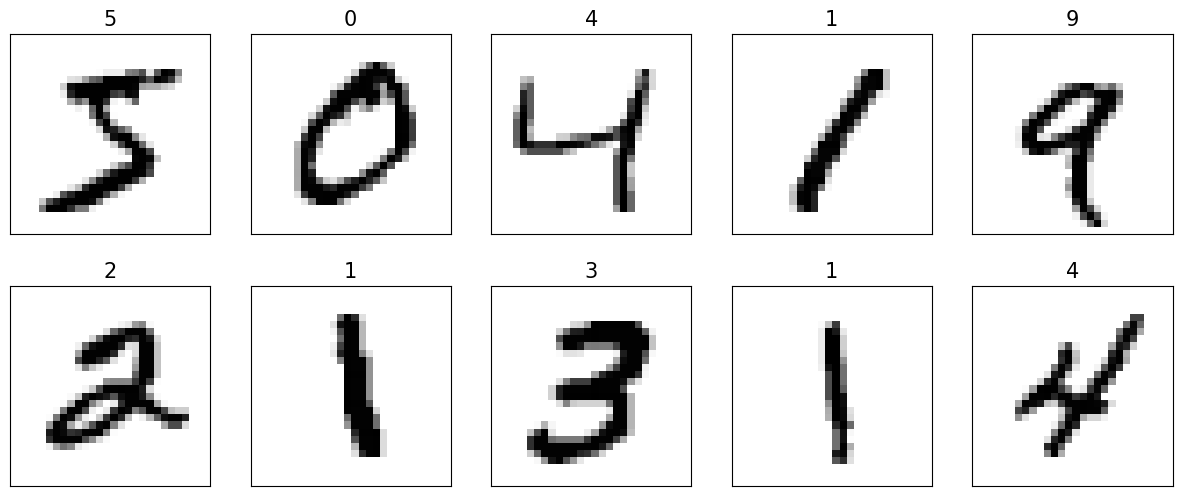

In [54]:
mnist_dataset = torchvision.datasets.MNIST(image_path, 'train', download=True)

assert isinstance(mnist_dataset, torch.utils.data.Dataset)

example = next(iter(mnist_dataset))
print(example)

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in islice(enumerate(mnist_dataset), 10):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}', size=15)

#plt.savefig('figures/12_06.pdf')
plt.show()